# Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy, math
import pandas as pd

In [2]:
def zscore_normal(x):
        mu = np.mean(x,axis=0)
        sigma = np.std(x,axis=0)
        x_norm = (x-mu)/sigma

        return (x_norm)
        
def mean_normal(x):
        mu = np.mean(x,axis=0)
        x_norm = (x-mu)/(np.max(x)-np.min(x))
                
        return (x_norm)

def r2_score(y,y_pred):
        y_avg = np.average(y, axis=0)
        num = 0
        den = 0
        for i in range(y.shape[0]):
                num = num + (y[i]-y_pred[i])**2
                den = den + (y[i]-y_avg)**2
        return (1 - (num/den))

def accuracy(y_pred, y_true):
        c = 0
        for i in range (y_true.shape[0]):
                if y_true[i] == y_pred[i]:
                        c += 1
                
        return (c/y_true.shape[0])
        
def plot_cost(Cost_list, iterations):
        t = np.arange(0, iterations)
        plt.plot(t, Cost_list)
        plt.show

In [3]:
class LinearRegression:

    def __init__(self,x,w,b,l,alpha,iterations,show_progress = False):
        self.x = x
        self.w = w
        self.b = b
        self.l = l
        self.alpha = alpha
        self.iterations = iterations
        self.show_progress = show_progress


    def cost(self,y,w,b,l):
        m = self.x.shape[0]
        f_wb = np.dot(self.x,w) + b
        cost = (np.sum(np.square(f_wb-y))/(2*m)) + (l/(2*m)) * np.sum(np.square(w))
        return cost
    
    def grad_fn (self,y,w,b,l):
        m = self.x.shape[0]
        f_wb = np.dot(self.x, w) + b
        err = f_wb - y
        dj_dw = (np.dot(err, self.x) / m) + (l/m)*w
        dj_db = np.sum(err) / m
        return dj_dw, dj_db
    
    def grad_descent(self,y):
        J_history = []
        l = self.l
        _w = copy.deepcopy(self.w)
        _b = self.b

        for i in range(self.iterations):

            dj_dw,dj_db=self.grad_fn(y,_w,_b,l)

            _w = _w - self.alpha * dj_dw
            _b = _b - self.alpha * dj_db

            if i<100000:
                J_history.append(self.cost(y,_w,_b,l))

            if self.show_progress and i% math.ceil(self.iterations / 10) == 0:
                print(f"Iteration {i:4d}: Cost {J_history[-1]:8.5f}   ")
        
        return _w, _b, J_history
    
    def predict(self,x,w,b):
        return (np.dot(x,w)+b)

In [4]:
file_path = 'Lineardata_train.csv'
df = pd.read_csv(file_path, dtype='float64')

y = df.iloc[:, 0].values
x = df.iloc[:, 1:].values

x_train = x[0:40000]
y_train = y[0:40000].reshape(-1,)

In [5]:
print("Shape of training set input: ", x_train.shape)
print("Shape of training set output: ", y_train.shape)

Shape of training set input:  (40000, 20)
Shape of training set output:  (40000,)


In [6]:
initial_w = np.zeros(x_train.shape[1])
initial_b = 0

x_train = zscore_normal(x_train)

iterations = 10000
alpha = 1.0
l = 10e-12

linear_model = LinearRegression(x_train,initial_w,initial_b,l,alpha,iterations, show_progress=True)

w_final, b_final, J_hist = linear_model.grad_descent(y_train)

y_pred = linear_model.predict(x_train,w_final,b_final)

Iteration    0: Cost 25739.01979   
Iteration 1000: Cost  0.00505   
Iteration 2000: Cost  0.00505   
Iteration 3000: Cost  0.00505   
Iteration 4000: Cost  0.00505   
Iteration 5000: Cost  0.00505   
Iteration 6000: Cost  0.00505   
Iteration 7000: Cost  0.00505   
Iteration 8000: Cost  0.00505   
Iteration 9000: Cost  0.00505   


In [7]:
r2score = r2_score(y_train,y_pred)
print("R2 Score for train data: ",r2score)

R2 Score for train data:  0.9999999999232193


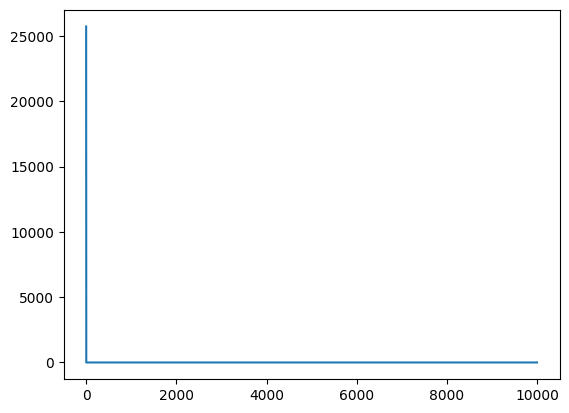

In [8]:
plot_cost(J_hist, iterations)

In [9]:
x_cv=x[40000:]
y_cv=y[40000:]
x_cv = np.array(x_cv,dtype=float)
y_cv = np.array(y_cv,dtype=float)
y_cv = y_cv.transpose()
x_cv = zscore_normal(x_cv)

In [10]:
print("Shape of cross validation set input: ", x_cv.shape)
print("Shape of cross validation set output: ", y_cv.shape)

Shape of cross validation set input:  (10000, 20)
Shape of cross validation set output:  (10000,)


In [11]:
y_cv_pred = linear_model.predict(x_cv, w_final, b_final)
print("R2 Score for cross validation data: ",r2_score(y_cv,y_cv_pred))

R2 Score for cross validation data:  0.9998732562290893


In [12]:
print(f"W found by linear regression: {w_final}")

W found by linear regression: [2.20066250e+01 3.31369827e+01 9.97515547e+00 6.04433310e+00
 1.75889769e+02 3.29270434e+02 2.53994823e+02 9.01879215e+02
 4.34971516e+02 8.38181865e+01 1.21184698e+02 1.60335867e+03
 1.67468334e+03 1.31824409e+03 5.97217418e+02 1.05670985e+04
 5.04822106e+02 6.78186528e+02 3.16118779e+03 2.29883908e+02]


In [13]:
print(f"B found by linear regression: {b_final}")

B found by linear regression: 77.26706370282317


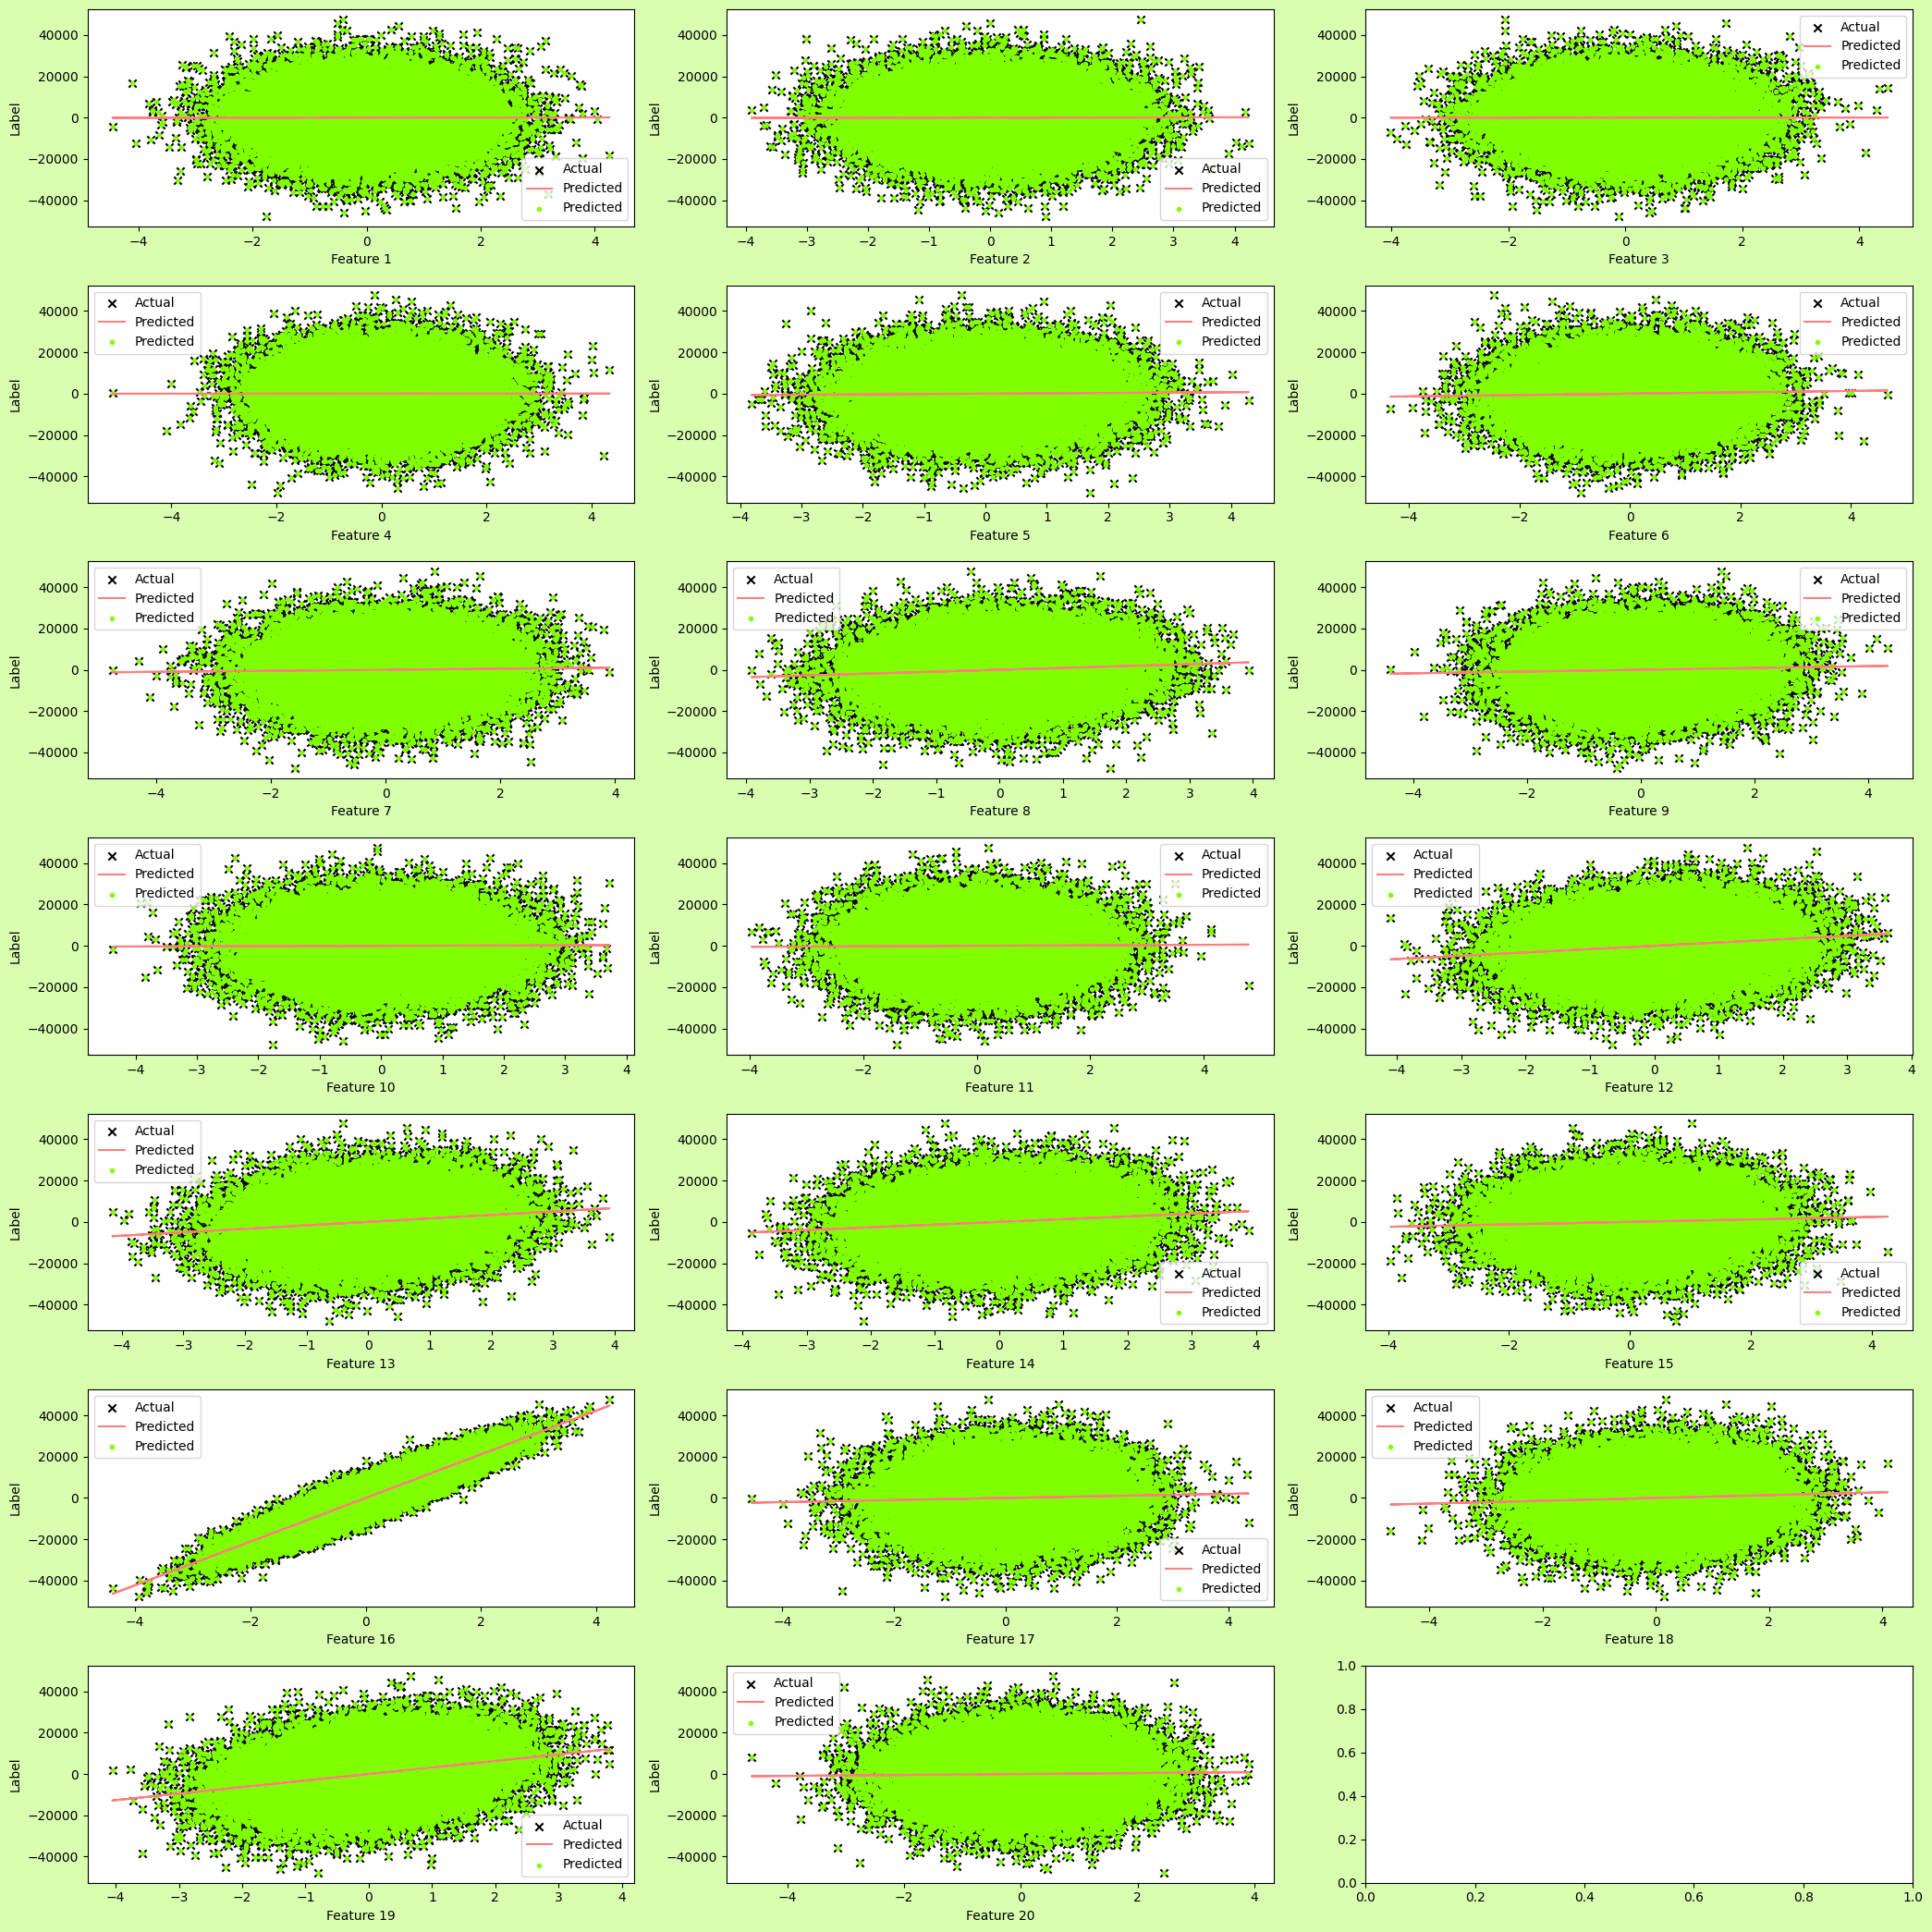

In [14]:
fig, axs = plt.subplots(7, 3, figsize=(21, 21))
fig.set_facecolor('#d8ffb0')

for i in range(0, x_train.shape[1]):
    axs[i // 3, i % 3].scatter(x_train[:, i], y_train, marker='x', c='#000000', label='Actual')
    axs[i // 3, i % 3].plot(x_train[:,i],w_final[i]*x_train[:,i],c='#ff7f7f',label='Predicted')
    axs[i // 3, i % 3].scatter(x_train[:, i], y_pred, marker='.', c='#7fff00', label='Predicted')
    axs[i // 3, i % 3].set_xlabel('Feature ' + str(i+1))
    axs[i // 3, i % 3].set_ylabel('Label')
    axs[i // 3, i % 3].legend()

plt.tight_layout()

plt.show()


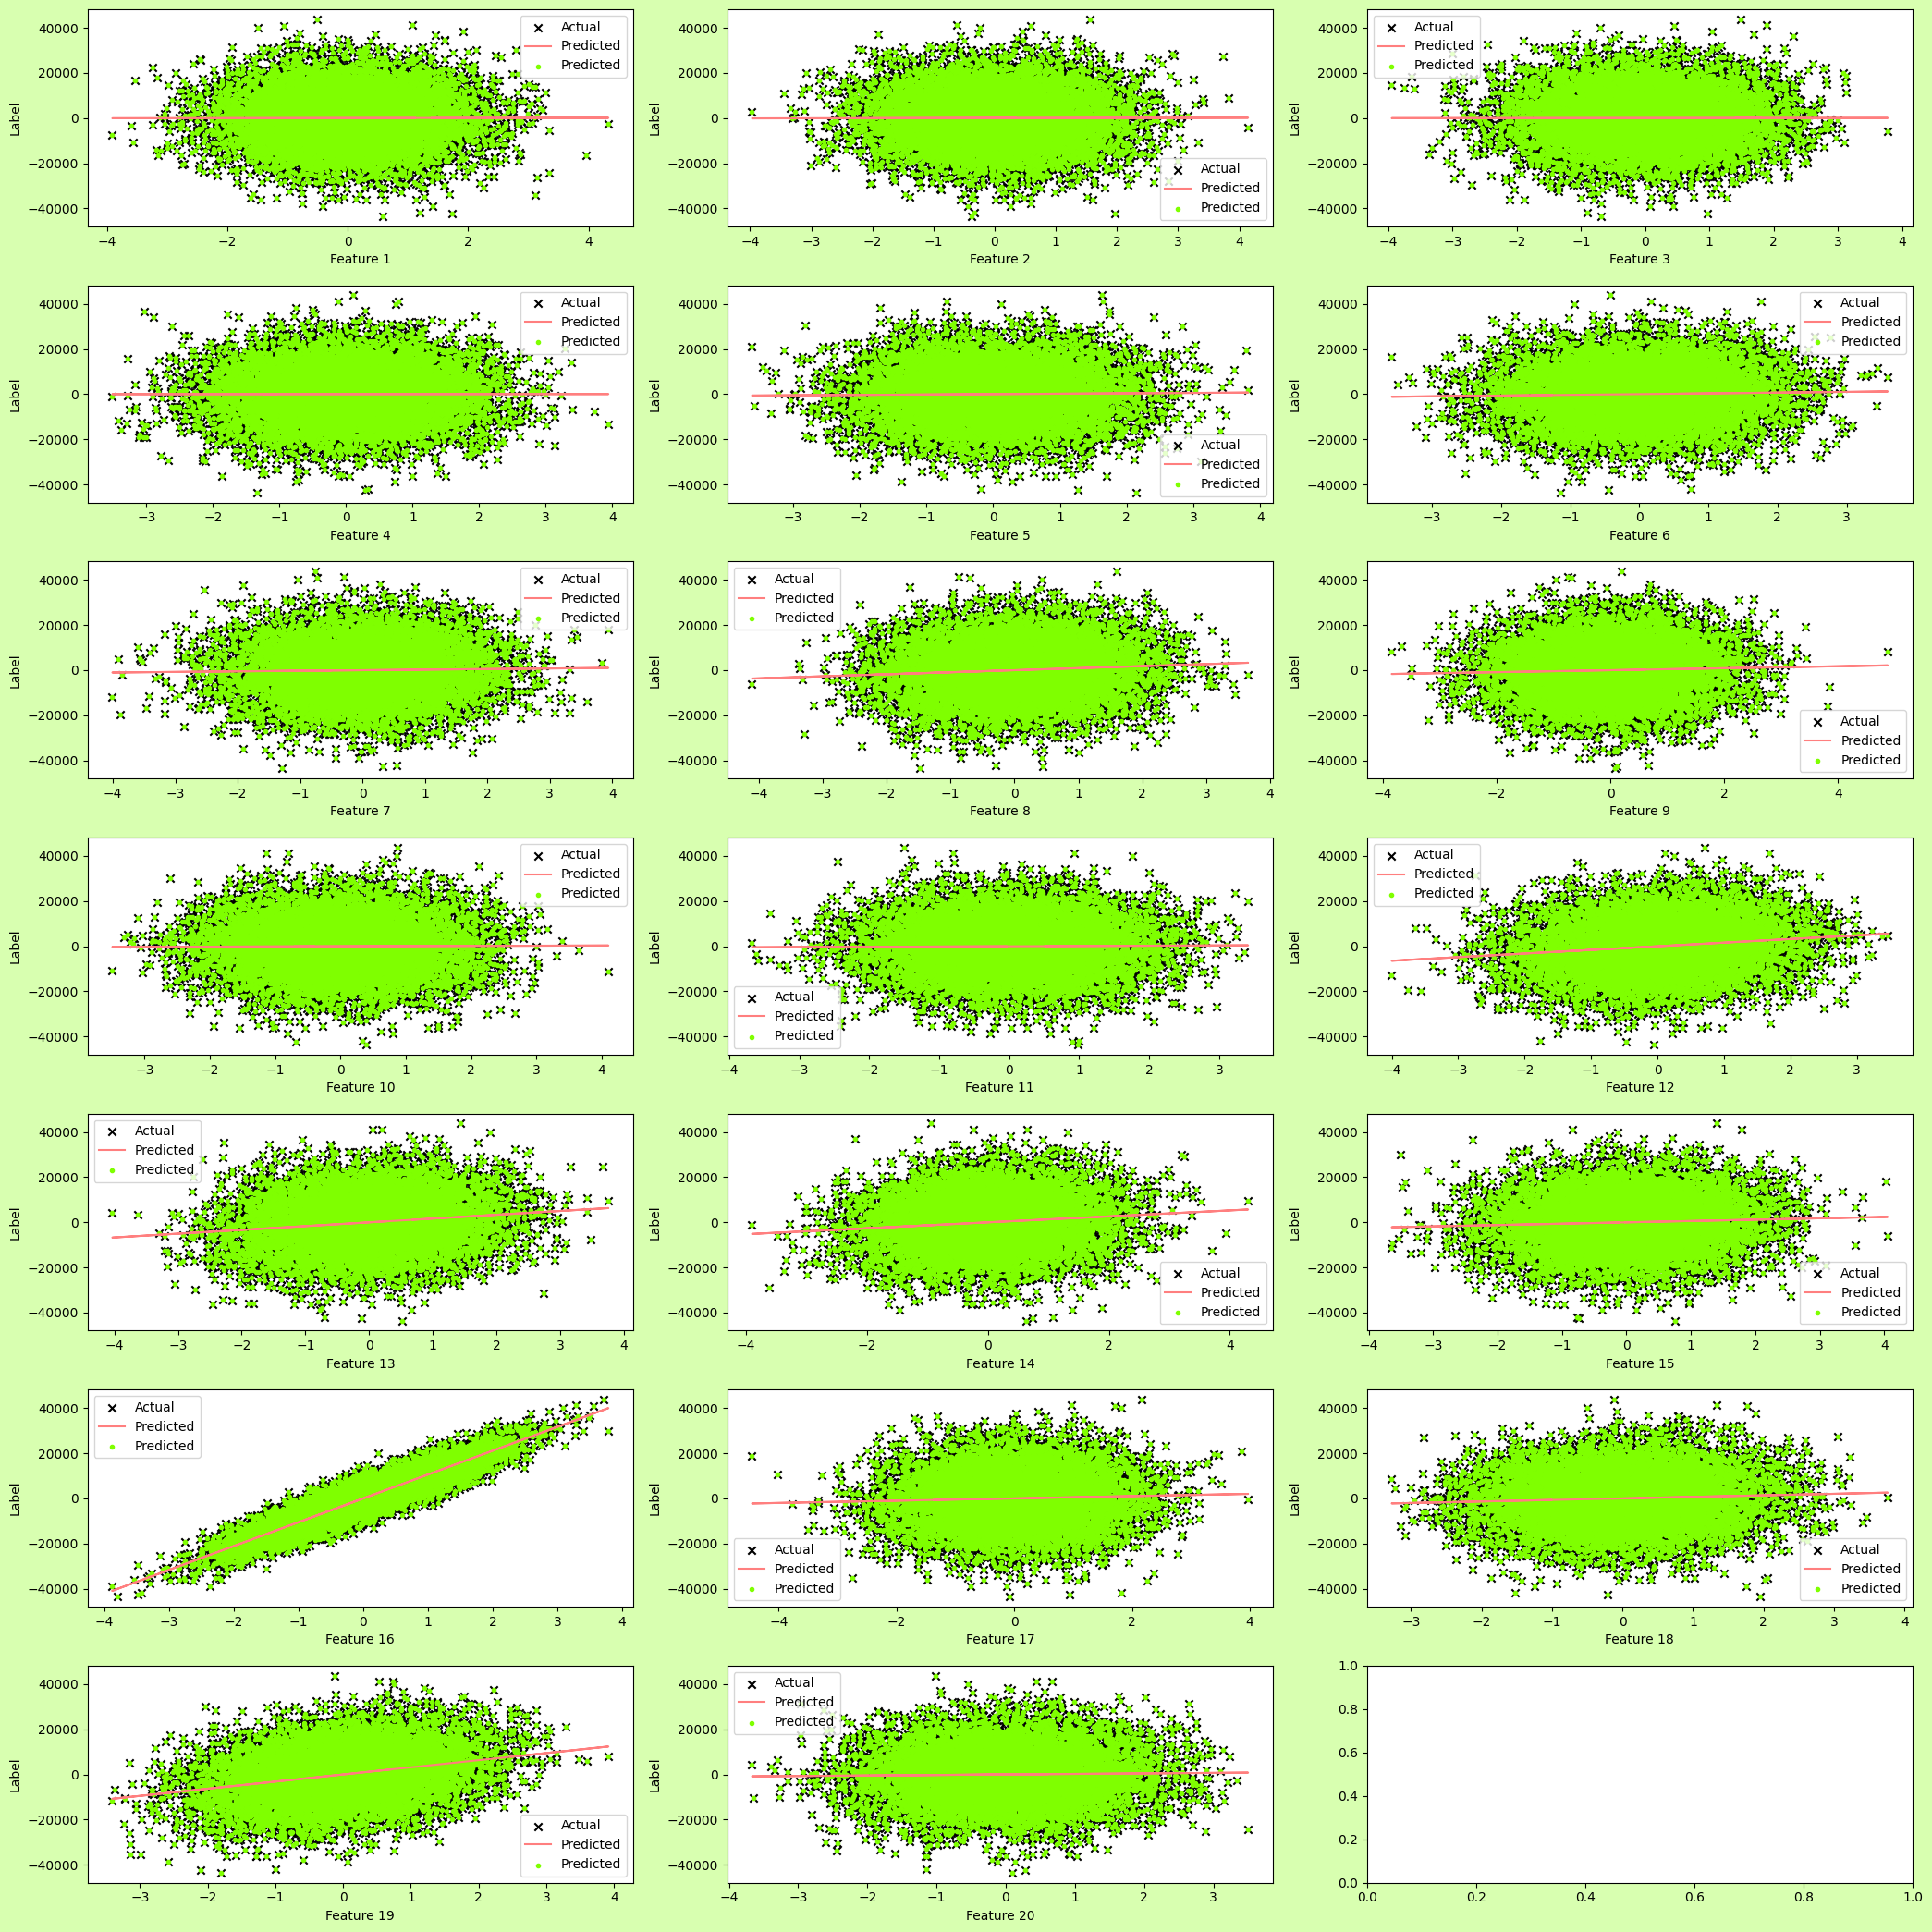

In [15]:
fig, axs = plt.subplots(7, 3, figsize=(21, 21))
fig.set_facecolor('#d8ffb0')

for i in range(0, x_cv.shape[1]):
    axs[i // 3, i % 3].scatter(x_cv[:, i], y_cv, marker='x', c='#000000', label='Actual')
    axs[i // 3, i % 3].plot(x_cv[:,i],w_final[i]*x_cv[:,i],c='#ff7f7f',label='Predicted')
    axs[i // 3, i % 3].scatter(x_cv[:, i], y_cv, marker='.', c='#7fff00', label='Predicted')
    axs[i // 3, i % 3].set_xlabel('Feature ' + str(i+1))
    axs[i // 3, i % 3].set_ylabel('Label')
    axs[i // 3, i % 3].legend()

plt.tight_layout()

plt.show()

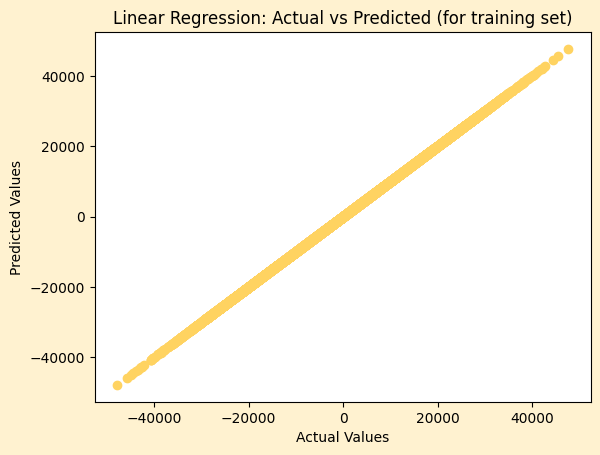

In [16]:
fig = plt.figure(facecolor='#fff2d0')

plt.scatter(y_train, y_pred, c = '#ffd361')


plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: Actual vs Predicted (for training set)")
plt.show()

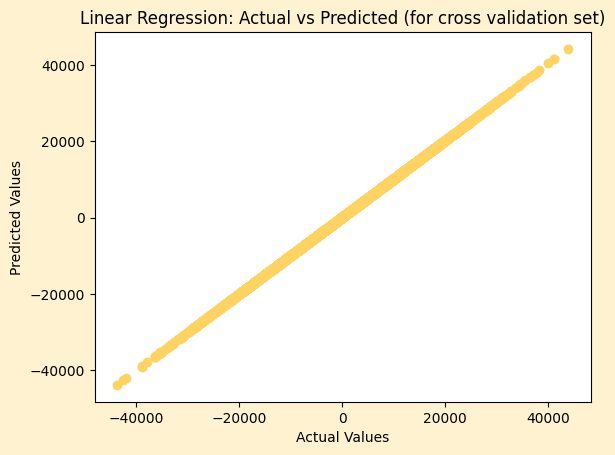

In [17]:
fig = plt.figure(facecolor='#fff2d0')

plt.scatter(y_cv, y_cv_pred, c = '#ffd361')


plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: Actual vs Predicted (for cross validation set)")
plt.show()

In [18]:
file_path = 'Lineardata_test.csv'
df = pd.read_csv(file_path, dtype='float64')

test_id = df.iloc[:, 0].values
x_test = df.iloc[:, 1:].values

x_test = np.array(x_test, dtype=float)
x_test = zscore_normal(x_test)

In [19]:
print("Shape of test set input: ", x_test.shape)

Shape of test set input:  (10000, 20)


In [20]:
y_test = linear_model.predict(x_test, w_final, b_final)

In [21]:
print(y_test)

[ -5428.07070175  17699.76682821   4679.18575474 ...   9563.39026619
 -15206.47465683  -1380.24243278]


In [22]:
output = np.array((test_id, y_test))
print(output)

[[ 14189.          14742.          13905.         ...  15552.
   12161.          14055.        ]
 [ -5428.07070175  17699.76682821   4679.18575474 ...   9563.39026619
  -15206.47465683  -1380.24243278]]


In [23]:
output_data = {'ID': output[0], 'Output': output[1]}

output_df = pd.DataFrame(output_data)

output_csv_path = 'Linear Regression Output.csv'
output_df.to_csv(output_csv_path, index=False)